In [1]:
# 필요한 패키지 설치
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
pd.set_option("display.max_columns",None) 
pd.set_option("display.max_rows",None) 

import warnings
warnings.filterwarnings("ignore")

from IPython.display import Image
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.neighbors import LocalOutlierFactor
sns.set(style="darkgrid", palette="pastel", color_codes=True)
sns.set_context('talk')
plt.rcParams['figure.dpi'] = 300


In [2]:
df_1 = pd.read_csv('heart_2020_cleaned.csv')

In [4]:
df_1.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [5]:
print(df_1.shape)

(319795, 18)


In [6]:
# BMI 분포 확인하기!

df_1['BMI'].describe()

count    319795.000000
mean         28.325399
std           6.356100
min          12.020000
25%          24.030000
50%          27.340000
75%          31.420000
max          94.850000
Name: BMI, dtype: float64

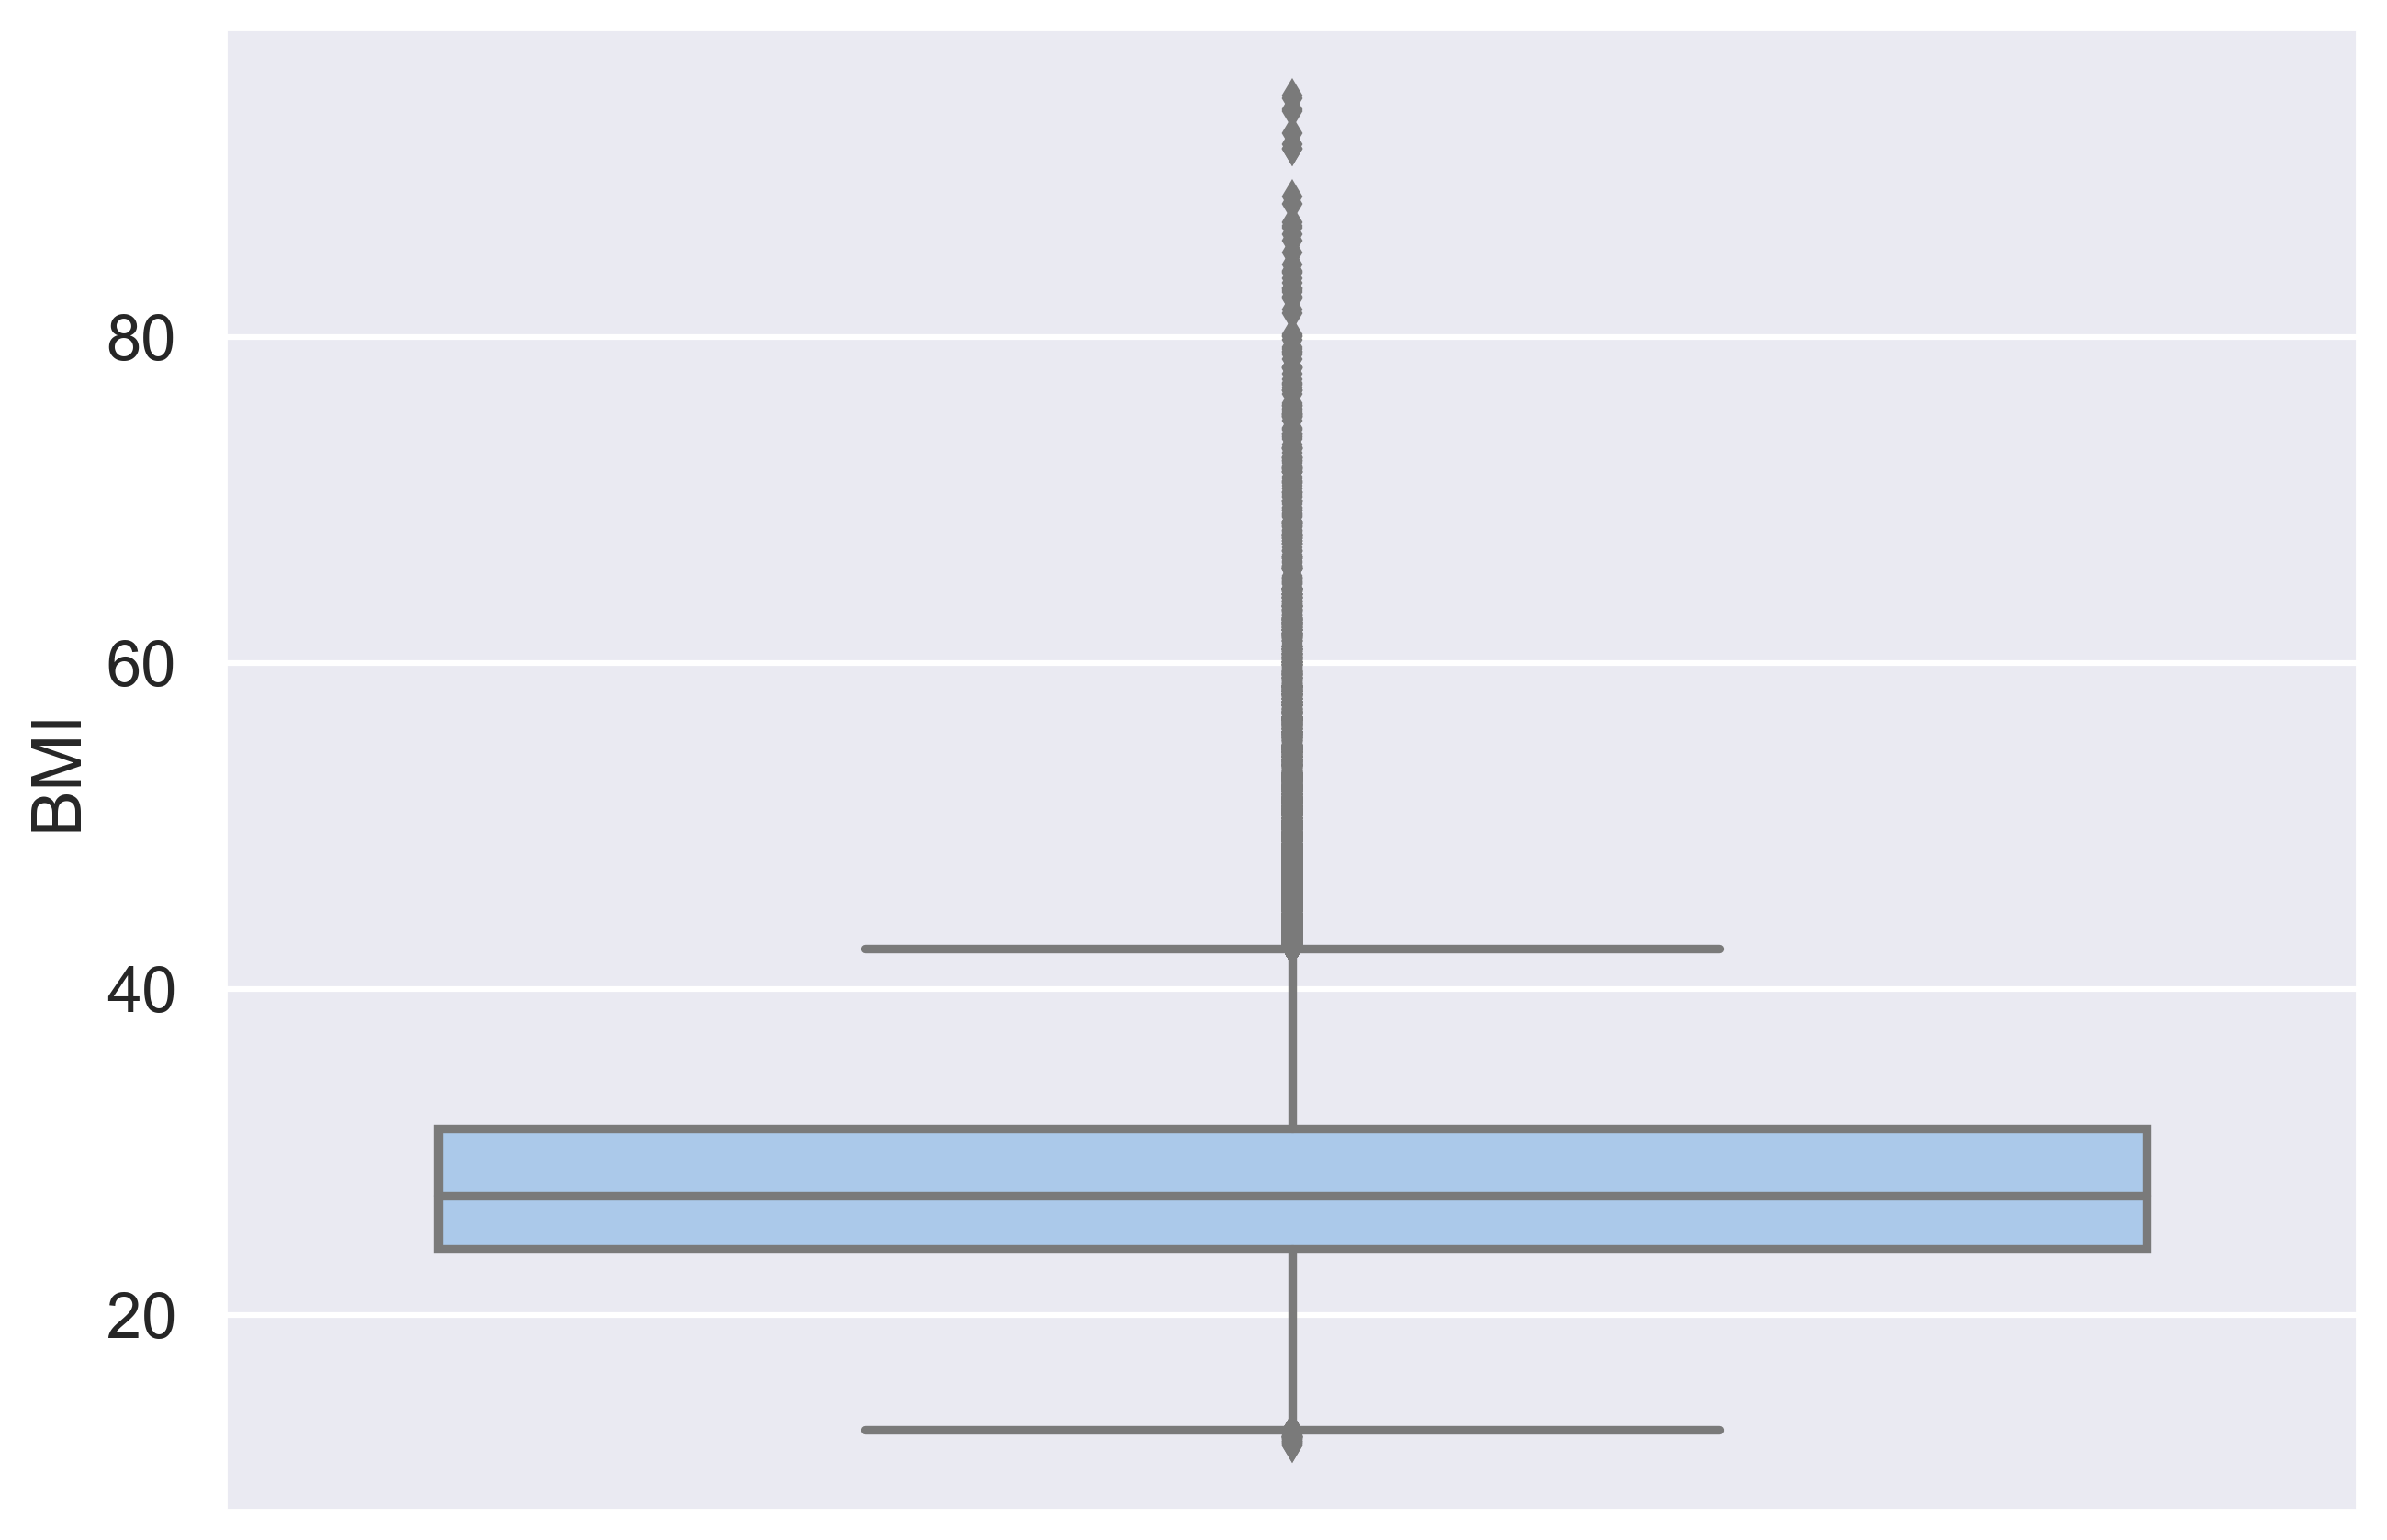

In [7]:
# BMI 박스플롯 시각화

plt.figure(figsize=(10,7))
sns.boxplot(y='BMI', data= df_1)
plt.show()

## 1.IQR방법을 이용해서 이상치를 조절해 보자!

In [14]:
#Q1 Q2의 값을 만들기!
Q1 = df_1['BMI'].quantile(0.25)
Q3 = df_1['BMI'].quantile(0.75)

#IQR 만들기! Q3-Q1
IQR = Q3- Q1

# 이상치 범위를 조절할 수 있다
out_range=1.5

In [16]:
#이상치 범위 설정

outlier_range=(df_1['BMI'] >= Q1-out_range*IQR) & (df_1['BMI']<= Q3+ out_range*IQR)

In [17]:
#이상치범위 데이터를 loc을 이용해서 접근

df_rmv = df_1.loc[outlier_range]

In [21]:
df_1['BMI'].describe()

count    319795.000000
mean         28.325399
std           6.356100
min          12.020000
25%          24.030000
50%          27.340000
75%          31.420000
max          94.850000
Name: BMI, dtype: float64

In [22]:
df_rmv['BMI'].describe()

count    309399.000000
mean         27.671533
std           5.217810
min          12.970000
25%          23.810000
50%          27.120000
75%          30.900000
max          42.500000
Name: BMI, dtype: float64

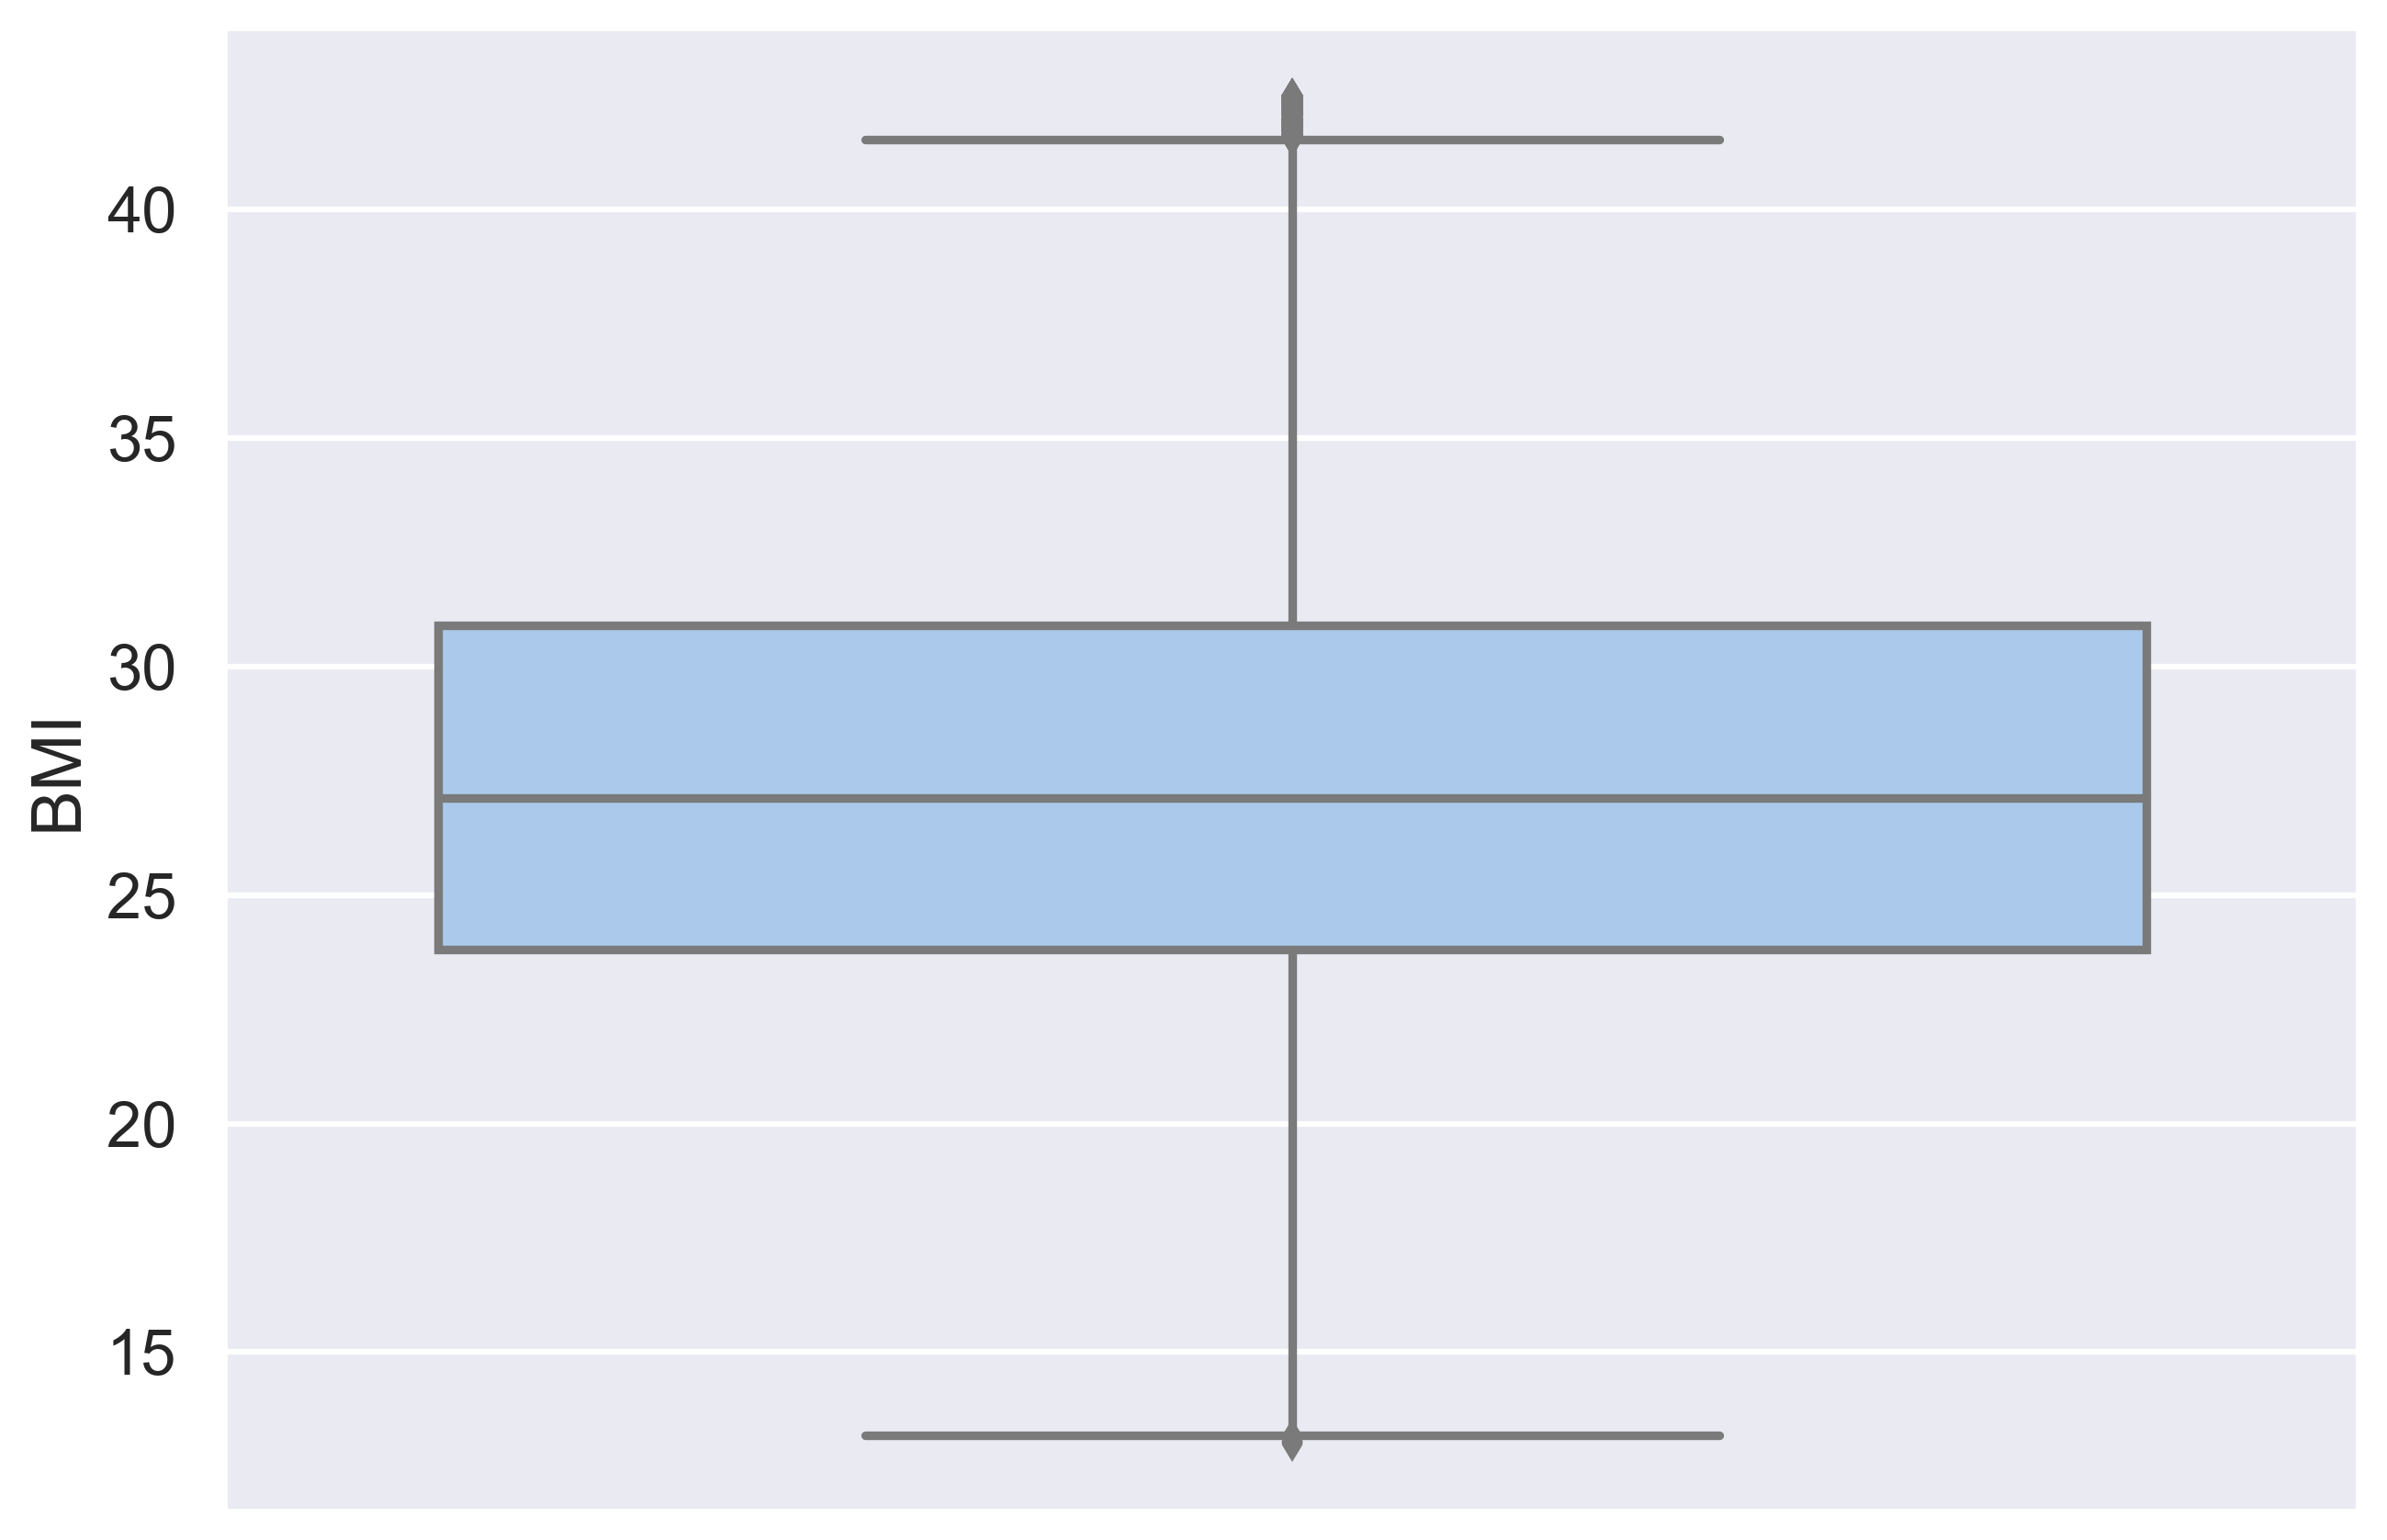

In [23]:
# BMI 박스플롯 시각화

plt.figure(figsize=(10,7))
sns.boxplot(y='BMI', data= df_rmv)
plt.show()

## 2. Standard Deviation Method

In [24]:
df_2= pd.read_csv('StudentsPerformance.csv')

In [27]:
df_2

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


<Axes: xlabel='writing score', ylabel='Density'>

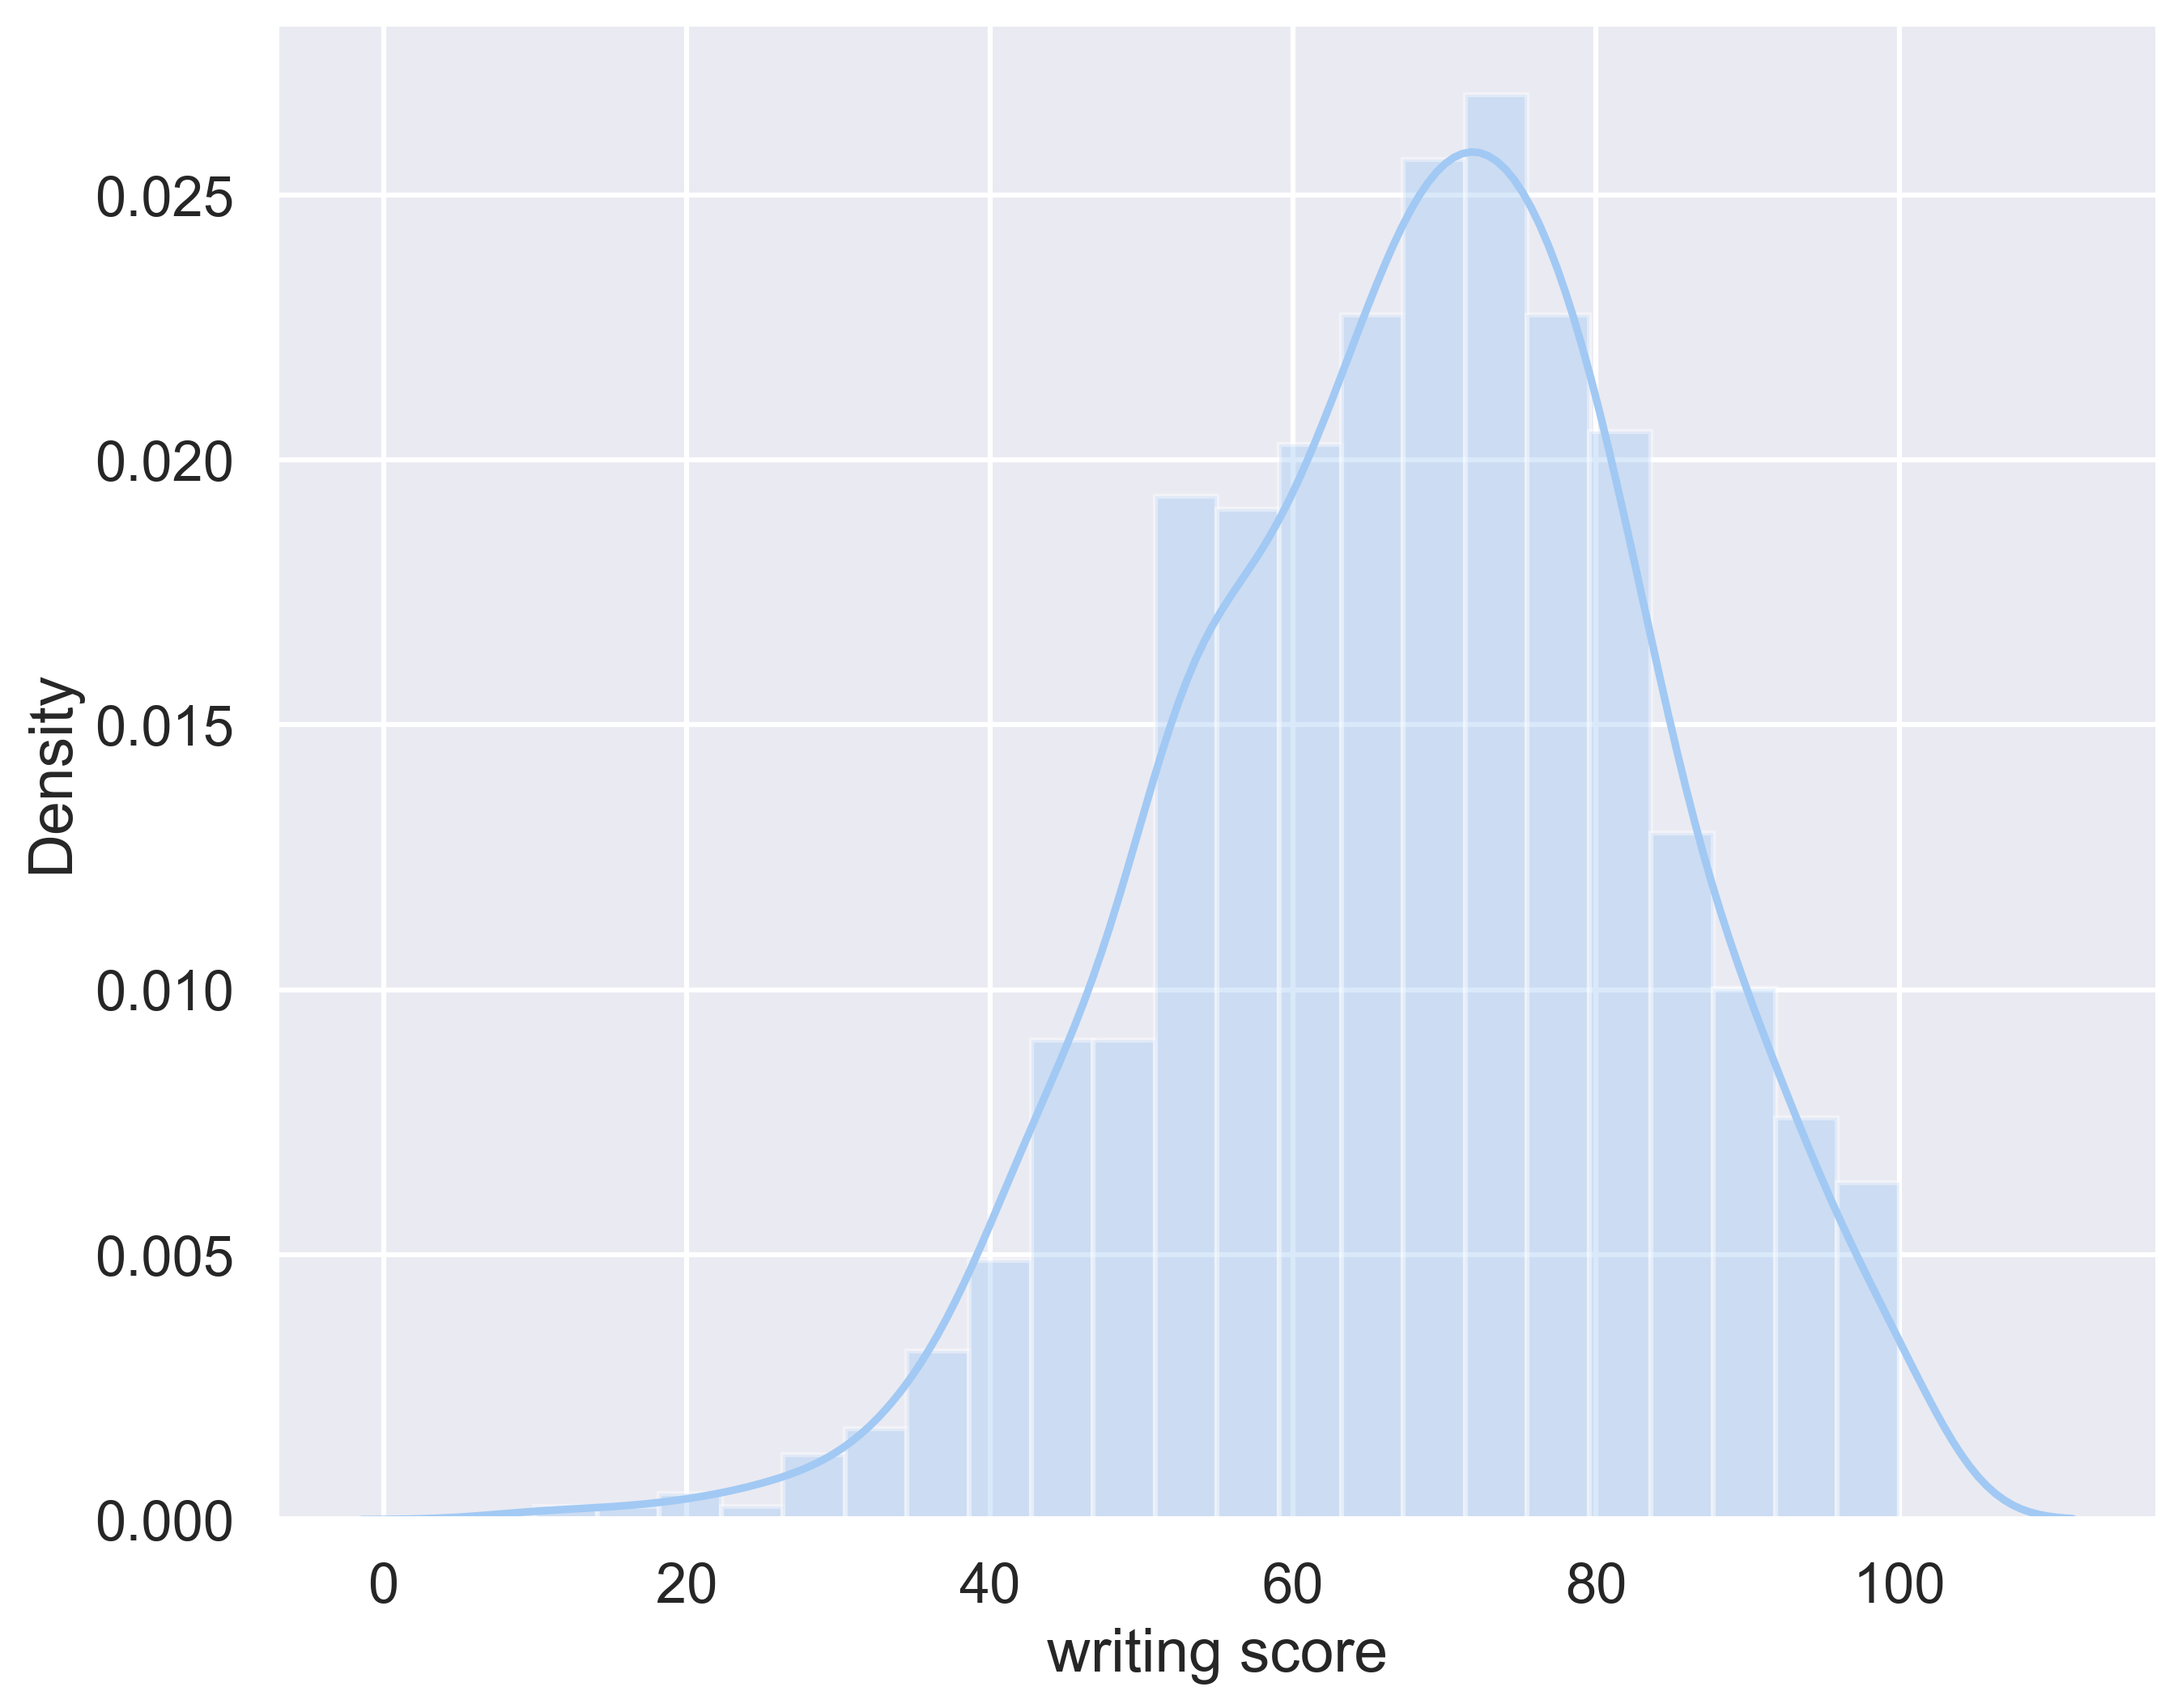

In [29]:
plt.figure(figsize=(10,8))
sns.distplot(df_2['writing score'])

In [32]:
def out_std(df, column):
    global lower, upper
    data_mean, data_std = df[column].mean(), df[column].std()
    
    # 표준편차에 얼마 범위 만큼 가지고 가고 나머지를 제거할 것인가?
    # 값은 원하는 만큼 조정 하면 된다.
    
    cut_off = data_std *3
    lower, upper = data_mean - cut_off, data_mean +cut_off # 평균에 빼고 더해서 , 범위 정하기
    print('lower',lower)
    print('upper',upper)
    
    df1 = df[df[column]>upper]
    df2 = df[df[column]<lower]
    
    return print('Outlier', df1.shape[0] + df2.shape[0])

In [33]:
out_std(df_2, 'writing score')

lower 22.46702896739105
upper 113.64097103260895
Outlier 4


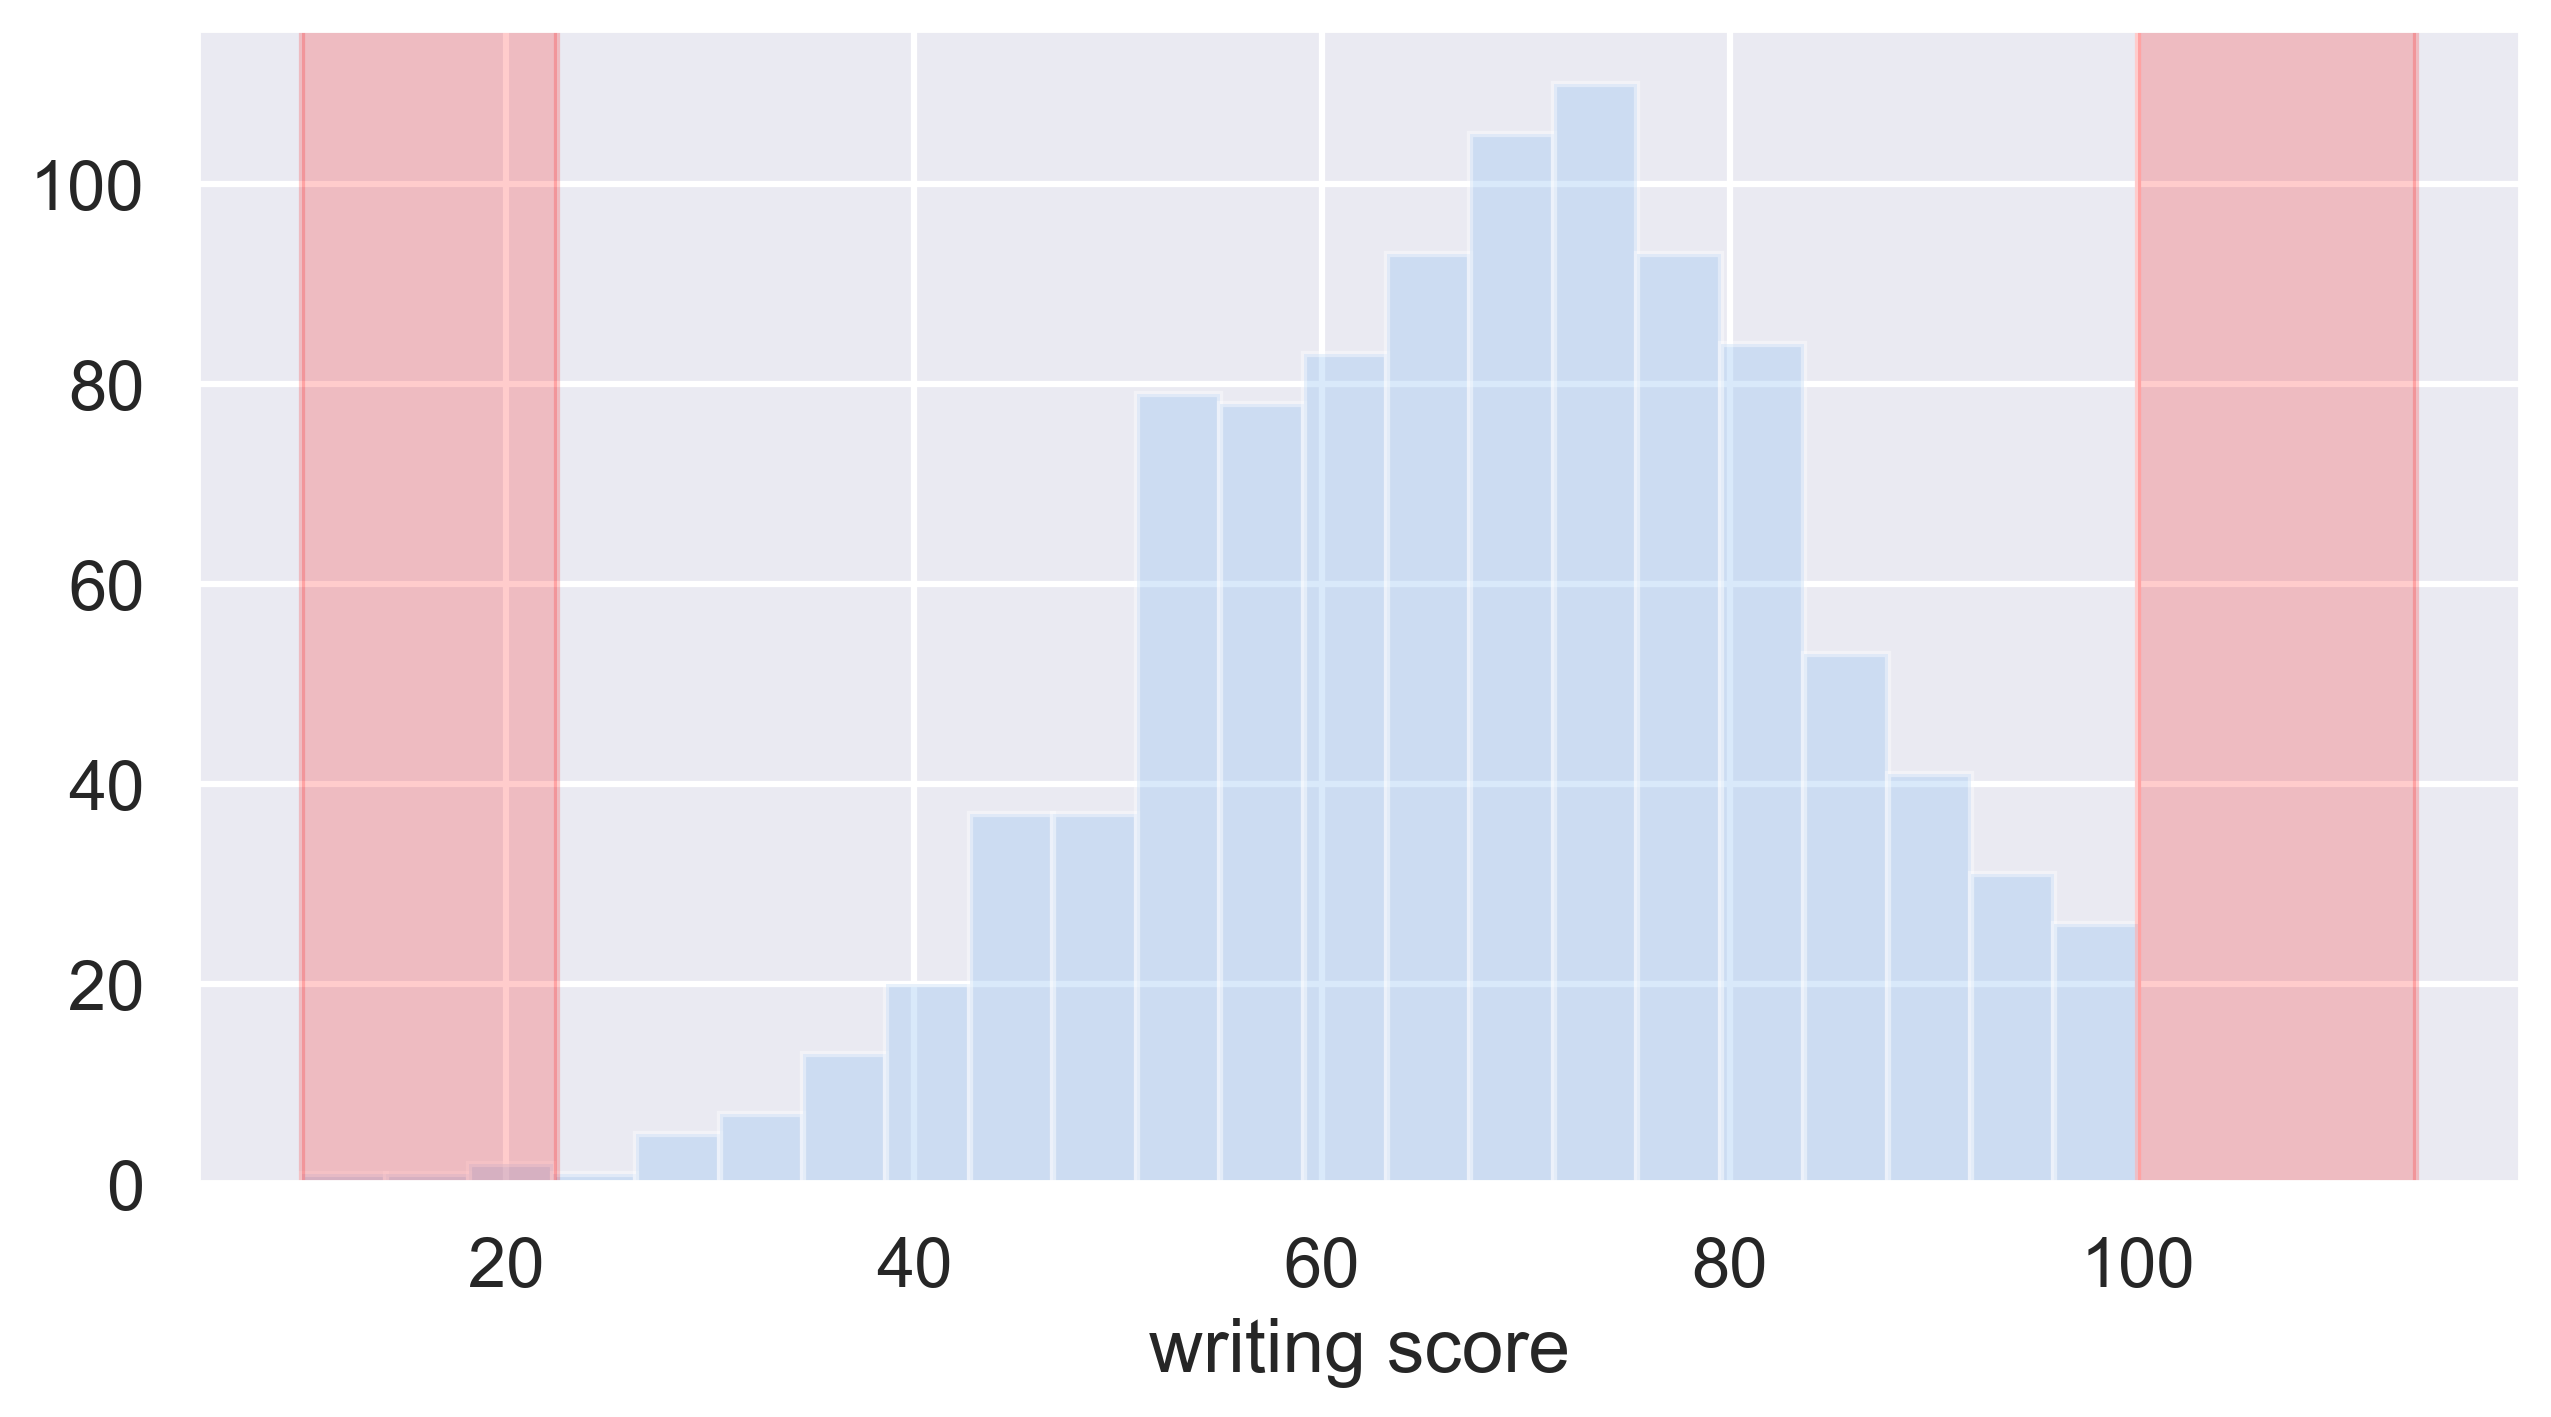

In [35]:
plt.figure(figsize=(10,5))
sns.distplot(df_2['writing score'], kde=False)
plt.axvspan(xmin = lower, xmax = df_2['writing score'].min(), alpha=0.2, color='red')
plt.axvspan(xmin = upper, xmax = df_2['writing score'].max(), alpha=0.2, color='red')

In [39]:
# outlier data
df_outlier = df_2[(df_2['writing score']>upper) | (df_2['writing score']< lower)]

In [40]:
#outlier데이터만 추출!
df_outlier

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
59,female,group C,some high school,free/reduced,none,0,17,10
76,male,group E,some high school,standard,none,30,26,22
327,male,group A,some college,free/reduced,none,28,23,19
596,male,group B,high school,free/reduced,none,30,24,15


## 3. Z-score method
- Z_score = (Xi-mean)/starndard deviation)

In [42]:
df_3 = pd.read_csv('insurance 2.csv')

In [45]:
df_3

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.924000
1,18,male,33.770,1,no,southeast,1725.552300
2,28,male,33.000,3,no,southeast,4449.462000
3,33,male,22.705,0,no,northwest,21984.470610
4,32,male,28.880,0,no,northwest,3866.855200
5,31,female,25.740,0,no,southeast,3756.621600
6,46,female,33.440,1,no,southeast,8240.589600
7,37,female,27.740,3,no,northwest,7281.505600
8,37,male,29.830,2,no,northeast,6406.410700
9,60,female,25.840,0,no,northwest,28923.136920


<Axes: xlabel='charges', ylabel='Density'>

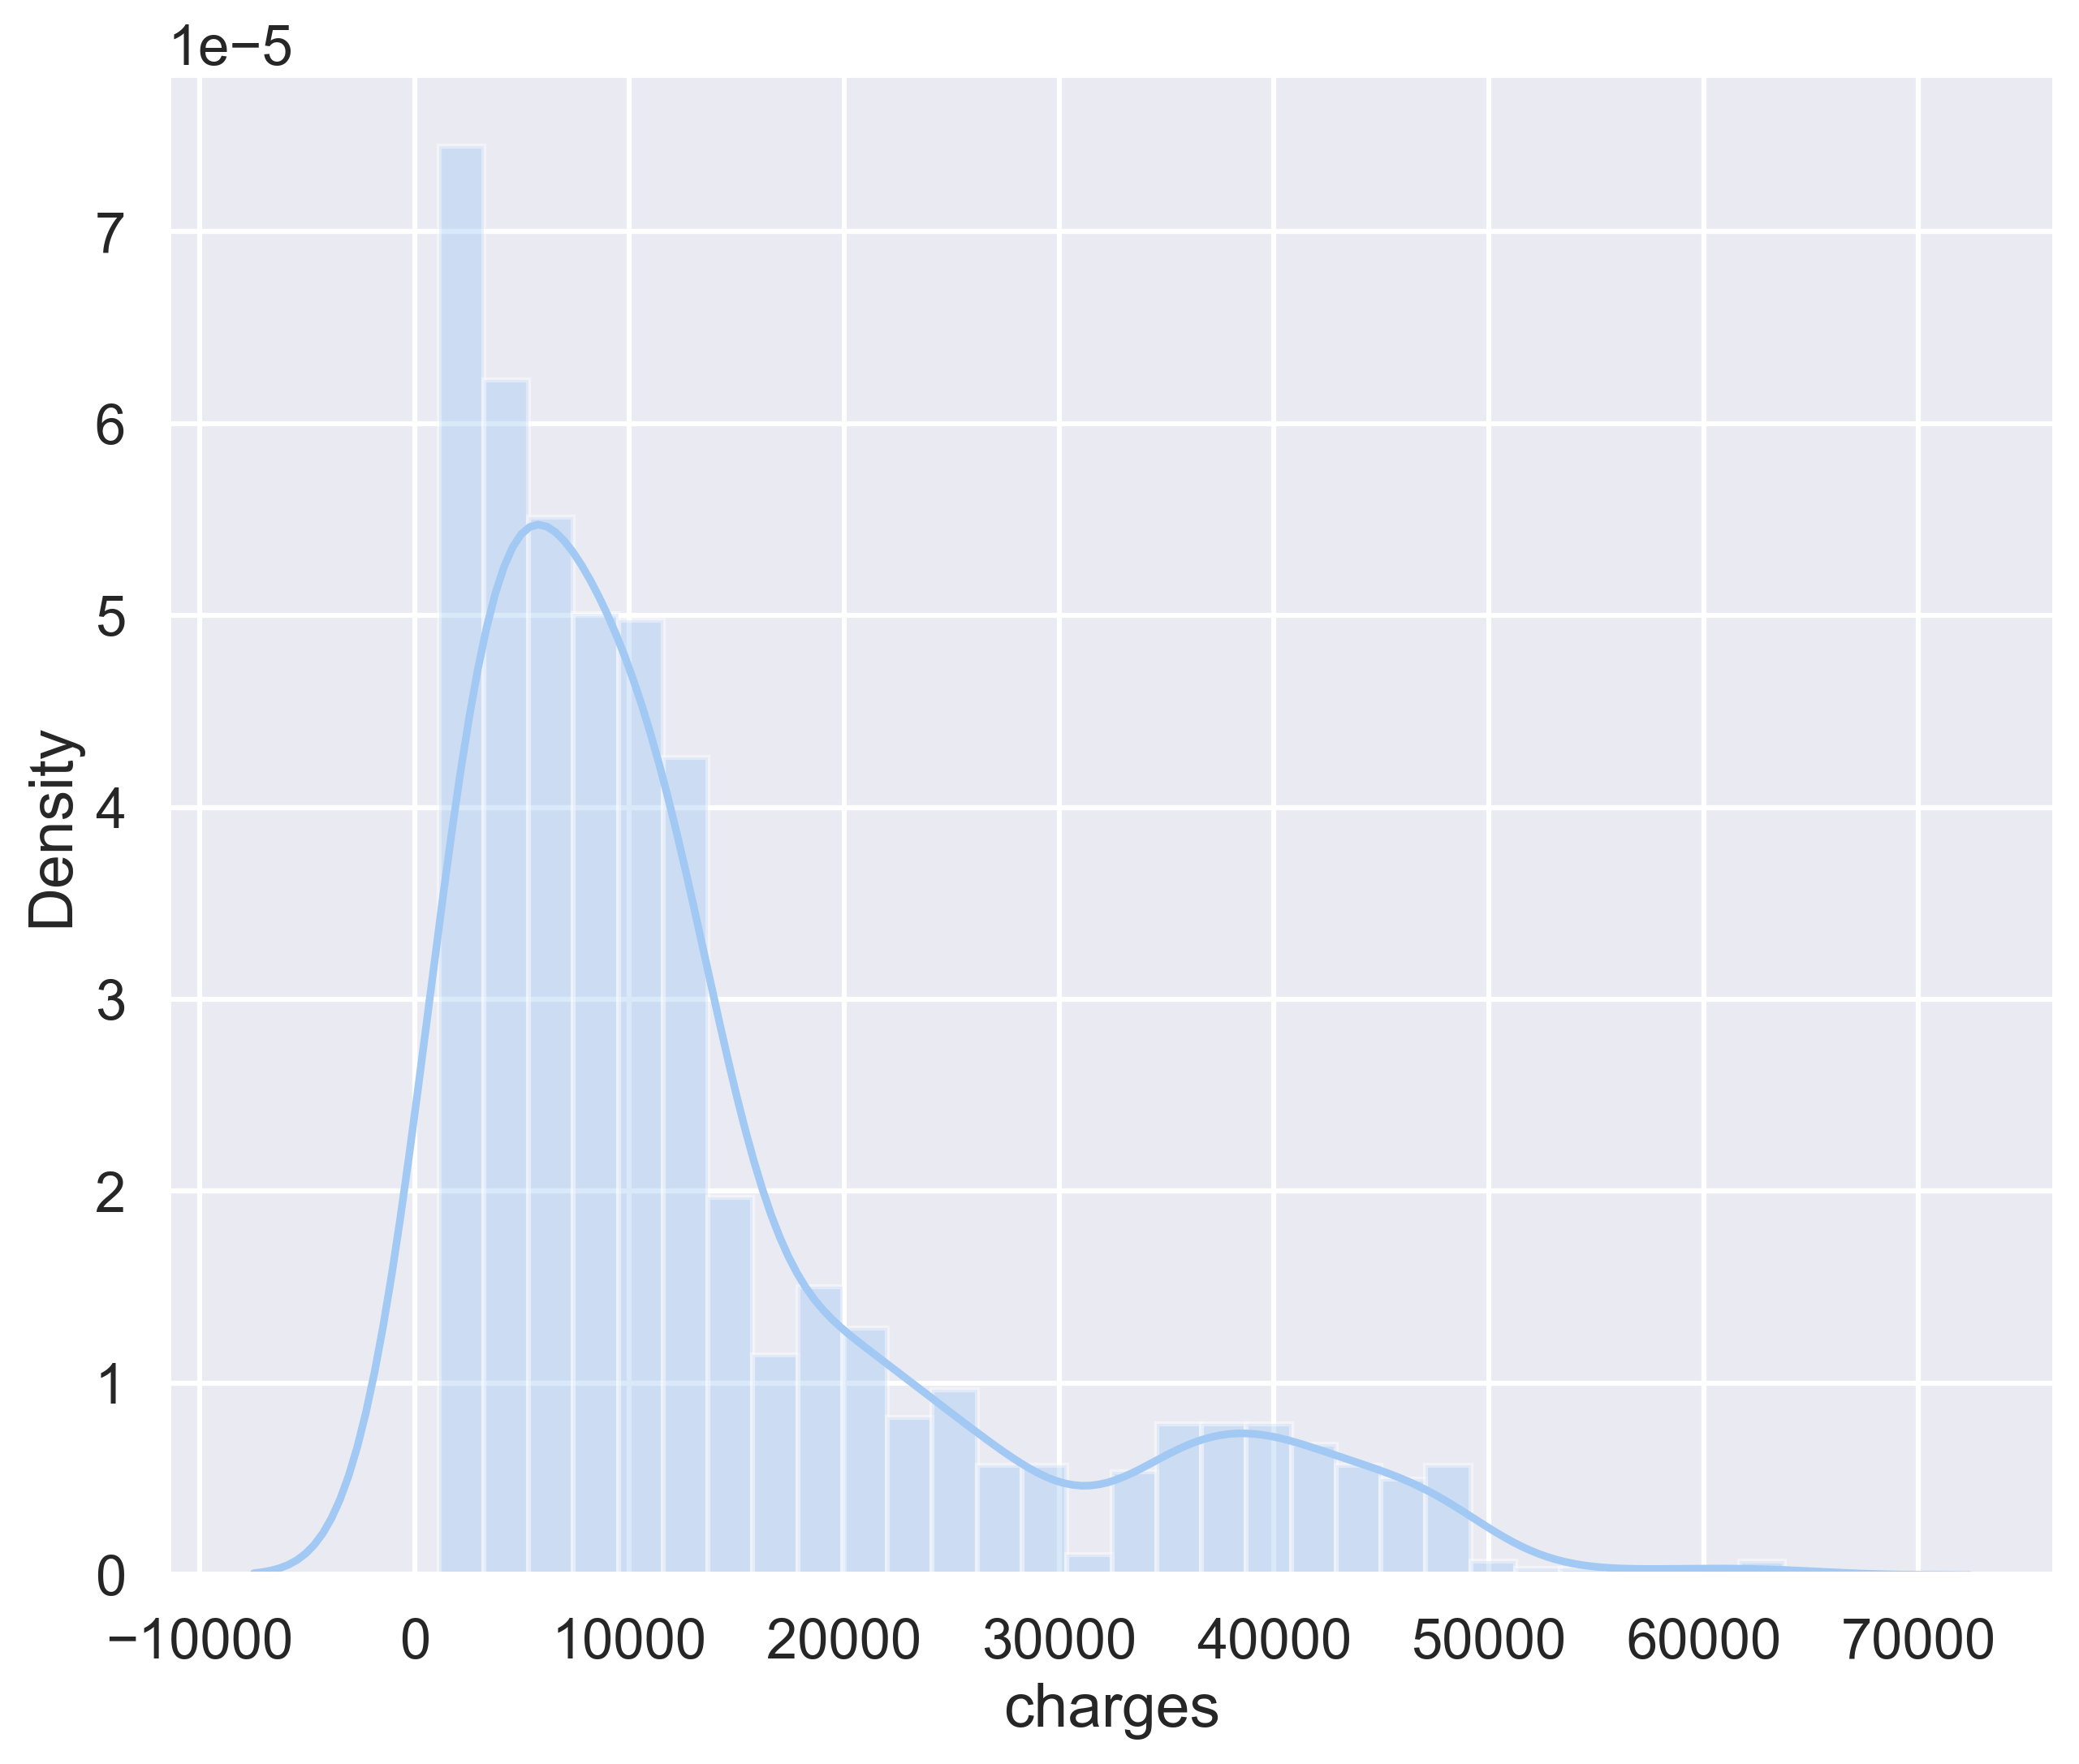

In [46]:
plt.figure(figsize=(10,8))
sns.distplot(df_3['charges'])

In [60]:
def out_zscore(data):
    global outliers, zscore
    #outlier 변수 담기 
    outliers =[]
    zscore= []
    
    #평균, 분산, threshold 를 지정해서 범위를 어디까지 할 것인가? (이상치에 대한 범위를)
    threshold = 2
    mean = np.mean(data)
    std = np.std(data)
    
    for i in data: #index 같이 넣어서 enumerate 같이 넣어서 {} 딕셔너리안에 인덱스 넣어서 추후 이 값들에 대한 인덱스를 가지고 와도 된다!
        z_score = (i- mean)/std
        zscore.append(z_score)
        if np.abs(z_score)> threshold:
            outliers.append(i)
    return print('Outlier', len(outliers))

In [61]:
out_zscore(df_3.charges)

Outlier 108


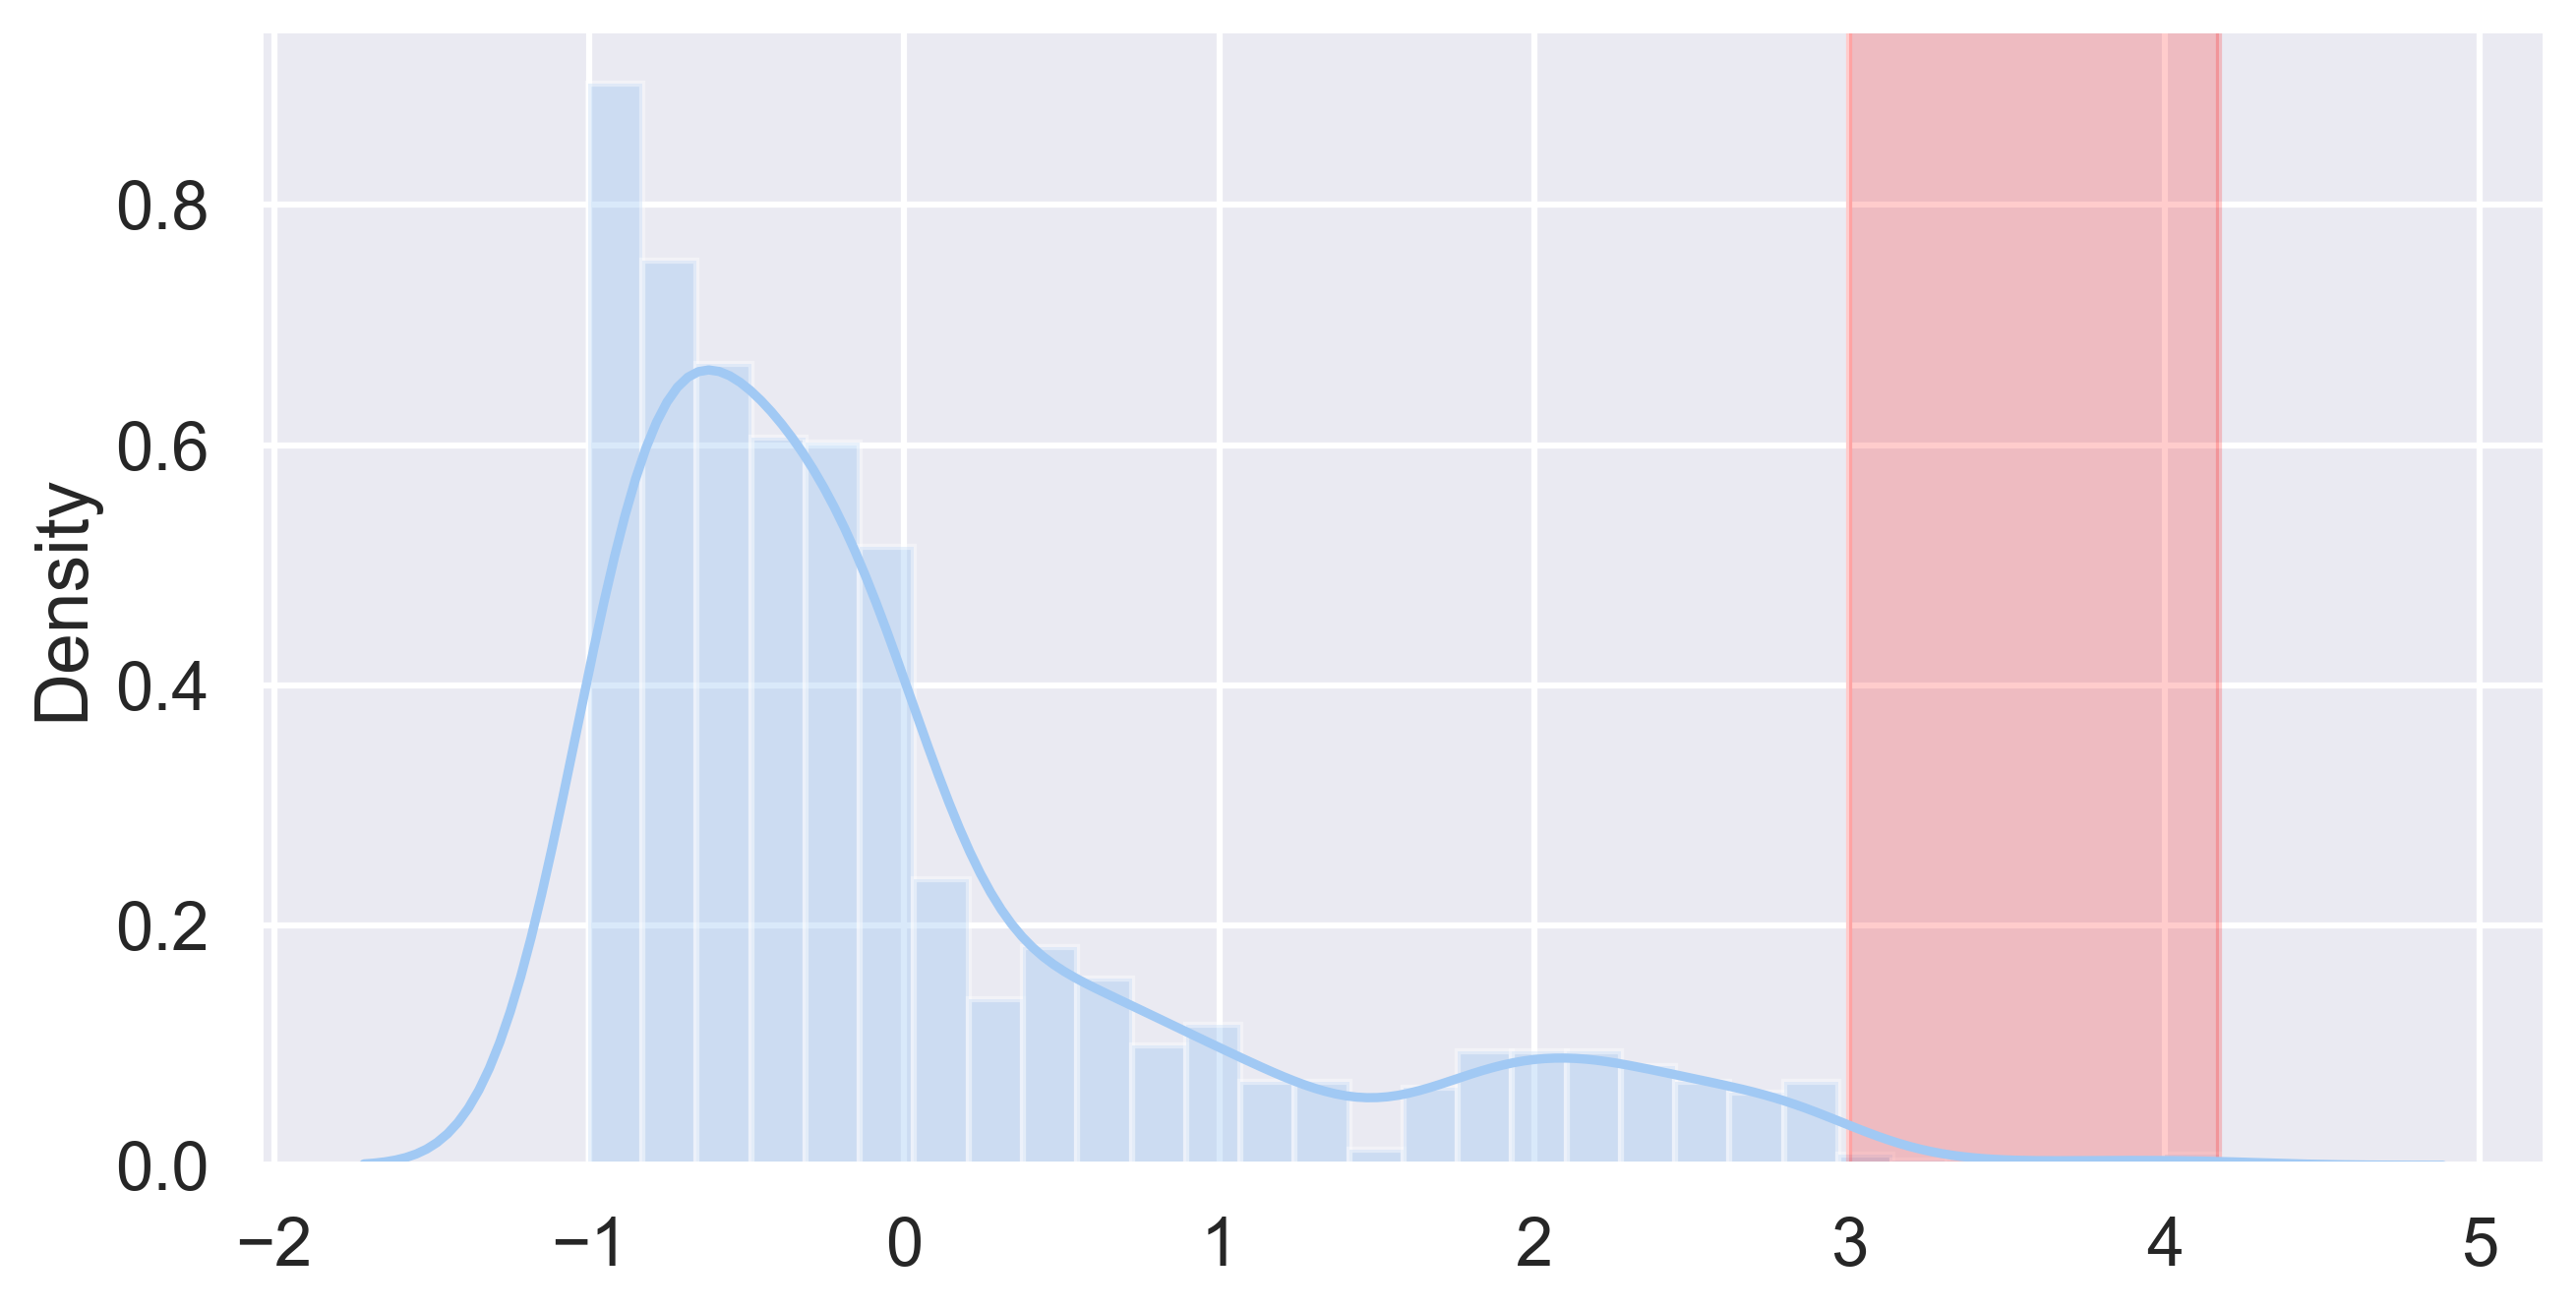

In [62]:
plt.figure(figsize=(10,5))
sns.distplot(zscore)
plt.axvspan(xmin = 3, xmax = max(zscore), alpha=0.2, color='red')

## 4.Isolation Forest 방법

In [70]:
from sklearn.ensemble import IsolationForest